In [19]:
from qiskit import QuantumCircuit
from qiskit.tools.visualization import circuit_drawer
import numpy as np
from matplotlib import pyplot as plt


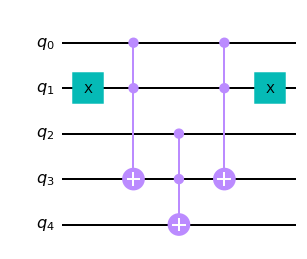

In [3]:
n=5
qc = QuantumCircuit(n)
qc.x(1)
qc.ccx(0, 1, 3)
qc.ccx(2, 3, 4)
qc.ccx(0, 1, 3)
qc.x(1)
qc.draw('mpl')

In [4]:
def phase_oracle(n, name = 'Uf'):
    qc = QuantumCircuit(n, name = name)
    qc.x(1)
    qc.ccx(0, 1, 3)
    qc.ccx(2, 3, 4)
    qc.ccx(0, 1, 3)
    qc.x(1)
    return qc

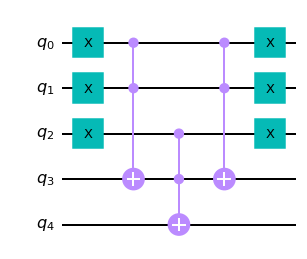

In [5]:
n=5
qc = QuantumCircuit(n)
for i in range(n-2):
    qc.x(i)
qc.ccx(0, 1, 3)
qc.ccx(2, 3, 4)
qc.ccx(0, 1, 3)
for i in range(n-2):
    qc.x(i)
qc.draw('mpl')

In [6]:
def diffuser(n, name= 'V'):
    qc = QuantumCircuit(n, name =name)

    for qb in range(n-2): # First layer of Hadamards in diffuser
        qc.h(qb)
        
    for i in range(n-2):
        qc.x(i)
    qc.ccx(0, 1, 3)
    qc.ccx(2, 3, 4)
    qc.ccx(0, 1, 3)
    for i in range(n-2):
        qc.x(i) 
        
    for qb in range(n-2): # Second layer of Hadamards in diffuser
        qc.h(qb)
        
    return qc    

r =  2


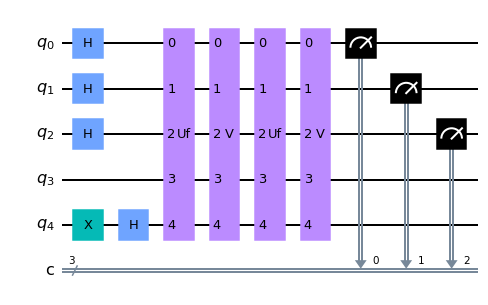

In [7]:
n=5
gr = QuantumCircuit(n, n-2)
mu = 1 #number of solutions

r = int(np.floor(np.pi/4*np.sqrt(2**(n-2)/mu))) #determine r
print('r = ',r)

gr.h(range(n-2)) #step1: apply Hadamard gates on all working qubits

#put ancilla in state |->
gr.x(n-1)
gr.h(n-1)

#step 2: apply r rounds of the phase oracle and the diffuser
for j in range(r):
    gr.append(phase_oracle(n), range(n))
    gr.append(diffuser(n), range(n))
    
gr.measure(range(n-2), range(n-2))    #step 3: measure all qubits

gr.draw('mpl')

In [ ]:
from qiskit import BasicAer, Aer, execute, IBMQ
from qiskit.visualization import plot_histogram

simulator = Aer.get_backend('qasm_simulator')
result = execute(gr, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

In [15]:
from qiskit import IBMQ
IBMQ.save_account('e19ab1a54fb68a1937a725b48b02eafb8af0db9189107e78762686e5bf12dff5642e1597470d966ea9d2e121cc86f4a0f08bea5d5e760de66c7be7be04fd2974')

configrc.store_credentials:WARNING:2022-07-19 20:01:54,748: Credentials already present. Set overwrite=True to overwrite.


In [17]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
device = provider.get_backend('ibmq_qasm_simulator')
job = execute(gr, backend=device, shots=1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

ibmqfactory.load_account:WARNING:2022-07-19 20:02:19,337: Credentials are already in use. The existing account in the session will be replaced.


62d70dcf14bf8fa15f0d0d73
Job Status: job has successfully run


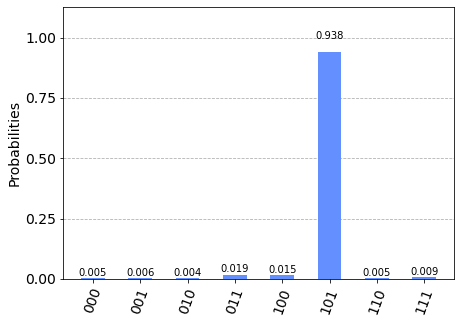

In [18]:
device_result = job.result()
plot_histogram(device_result.get_counts(gr))